<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

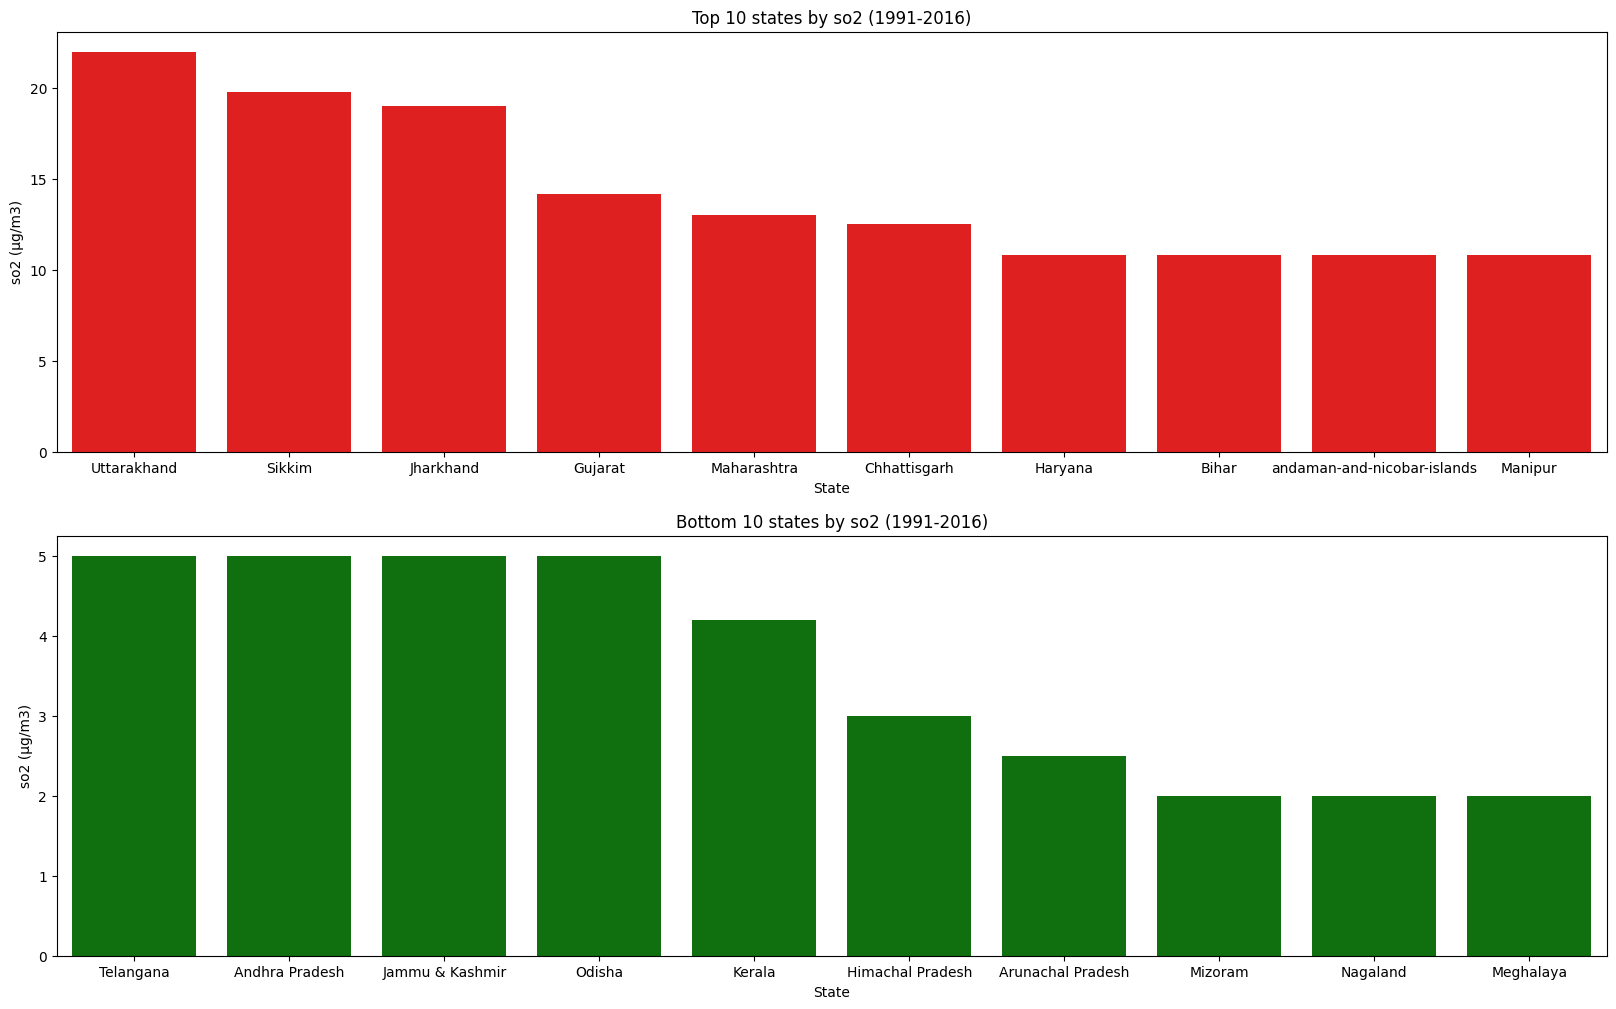

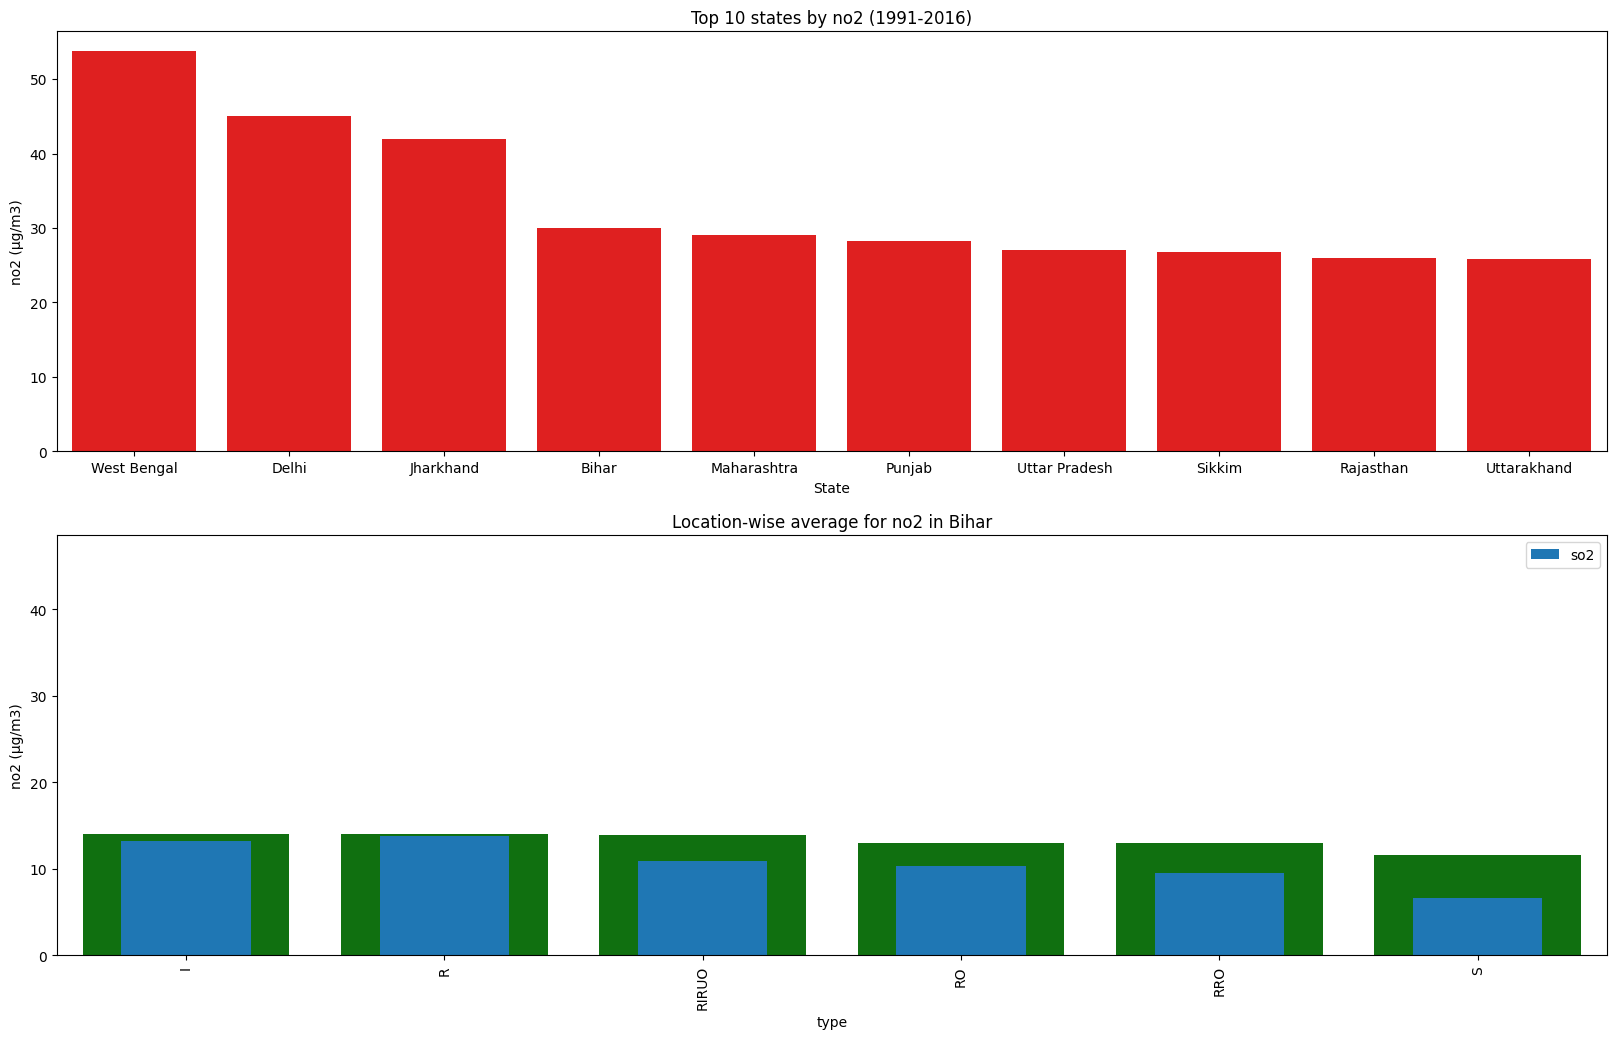

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

# Supressing update warnings
warnings.filterwarnings ('ignore')

data = pd.read_csv("data.csv", encoding="cp1252")
data
data.info()

# Cleaning up name changes
data.state = data.state.replace({'Uttaranchal': 'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar": "Jharkhand"})

# Changing types to uniform format
types = {
 "Residential": "R",
 "Residential and others": "RO",
 "Residential, Rural and other Areas": "RRO",
 "Industrial Area": "I",
 "Industrial Areas": "I",
 "Industrial": "I",
 "Sensitive Area": "S",
 "Sensitive Areas": "S",
 "Sensitive": "S",
 np.nan: "RRO"
}
data.type = data.type.replace(types)
data.head()

# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

#invoking SimpleImputer to fill missing values
imputer = SimpleImputer (missing_values=np.nan, strategy='mean')
data [VALUE_COLS] = imputer.fit_transform(data [VALUE_COLS])

# checking to see if the dataset has any null values Left over and the format
print(data.isnull().sum())
data.tail()

#Plotting highest and Lowest ranking states
#defining a function to find and plot the top 10 and bottom 10 states for a given
def top_and_bottom_10_states (indicator="so2"):
 fig, ax = plt.subplots (2,1, figsize=(20, 12))
 ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator, ascending=False)
 top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
 top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
 top10.set_ylabel(f"{indicator} (µg/m3)")
 top10.set_xlabel("State")
 bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax [1], color='green')
 bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
 bottom10.set_ylabel(f"{indicator} (µg/m3)")
 bottom10.set_xlabel("State")

top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

# Plotting the highest ever recorded Levels
#defining a function to find the highest ever recorded Levels for a given indicato
#sidenote: mostly outliers
def highest_levels_recorded (indicator="so2"):
    plt.figure(figsize=(20,10))
    # 'date' was removed from this list, as it's not numeric
    ind = data[[indicator, 'location', 'state']].groupby(['state', 'location'], as_index=False).mean()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks (rotation =90)

# Plotting pollutant average by type
#defining a function to plot pollutant averages by type for a given indicator
def type_avg(indicator=""):
    # 'date' was removed from this list
    type_avg = data[VALUE_COLS + ['type']].groupby("type").mean()
    if indicator:
        t = type_avg[indicator].plot(kind='bar')
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.title("Pollutant average by type")
    plt.xticks (rotation = 0)
 
type_avg('so2')

# Plotting pollutant averages by Locations/state
#defining a function to plot pollutant averages for a given indicator (defaults to
def location_avgs (state, indicator="so2"):
    # 'date' was removed from this list
    locs = data[VALUE_COLS + ['state', 'location']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks (rotation =90)

location_avgs ("Bihar", "no2")